In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('Vital_Statistics_Deaths_by_Region_and_Age-Group_by_Selected_Cause_of_Death___Beginning_2003.csv')
data.dtypes

In [4]:
data

,Year,Sex,Age Group,Race or Ethnicity,Selected Cause of Death,Deaths
0,2016,M,85+,Black Non Hispanic,Accidents,18
1,2016,M,45-54,Hispanic,Cerebrovascular Disease,31
2,2016,M,25-34,Other Non Hispanic,Pneumonia,1
3,2016,F,9-Jan,Black Non Hispanic,Malignant Neoplasms,5
4,2016,M,65-74,Black Non Hispanic,Diseases of the Heart,709
5,2016,M,55-64,White Non Hispanic,Diabetes Mellitus,43
6,2016,M,55-64,Other Non Hispanic,Diabetes Mellitus,7
7,2016,F,25-34,Not Stated,All Other Causes,10
8,2016,M,65-74,Black Non Hispanic,Pneumonia,87
9,2016,M,65-74,Hispanic,Total,1399


In [5]:
#creates a new dataframe that isolates 2016 data
twentysixteen = data[data.Year == 2016]

#different method of isolating data
#isolates data from 2003

# data.groupby('Year').get_group(2003)

#prints the top of the dataframe
twentysixteen.head()

,Year,Sex,Age Group,Race or Ethnicity,Selected Cause of Death,Deaths
0,2016,M,85+,Black Non Hispanic,Accidents,18
1,2016,M,45-54,Hispanic,Cerebrovascular Disease,31
2,2016,M,25-34,Other Non Hispanic,Pneumonia,1
3,2016,F,9-Jan,Black Non Hispanic,Malignant Neoplasms,5
4,2016,M,65-74,Black Non Hispanic,Diseases of the Heart,709


In [7]:
data['Race or Ethnicity'].unique()

array(['Black Non Hispanic', 'Hispanic', 'Other Non Hispanic',
       'White Non Hispanic', 'Not Stated'], dtype=object)

In [8]:
data['Selected Cause of Death'].unique()

array(['Accidents', 'Cerebrovascular Disease', 'Pneumonia',
       'Malignant Neoplasms', 'Diseases of the Heart',
       'Diabetes Mellitus', 'All Other Causes', 'Total', 'CLRD', 'AIDS'],
      dtype=object)

In [9]:
# remove rows that contain 'Total'
data = data[data['Selected Cause of Death'] != 'Total']
data['Selected Cause of Death'].unique()

array(['Accidents', 'Cerebrovascular Disease', 'Pneumonia',
       'Malignant Neoplasms', 'Diseases of the Heart',
       'Diabetes Mellitus', 'All Other Causes', 'CLRD', 'AIDS'],
      dtype=object)

In [107]:
print('pandas array: {}'.format(data['Year'].unique()))
years = data['Year'].unique().tolist()

#reverses the list
years.reverse()
print('list: {}'.format(years))

pandas array: [2016 2015 2014 2013 2012 2011 2010 2009 2008 2007 2006 2005 2004 2003]
list: [2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]


In [70]:
data.groupby('Year')['Deaths'].sum()

Year
2003    154930
2004    151369
2005    151095
2006    147760
2007    146597
2008    147760
2009    144954
2010    144892
2011    147072
2012    147365
2013    147456
2014    147780
2015    154414
2016    153667
Name: Deaths, dtype: int64

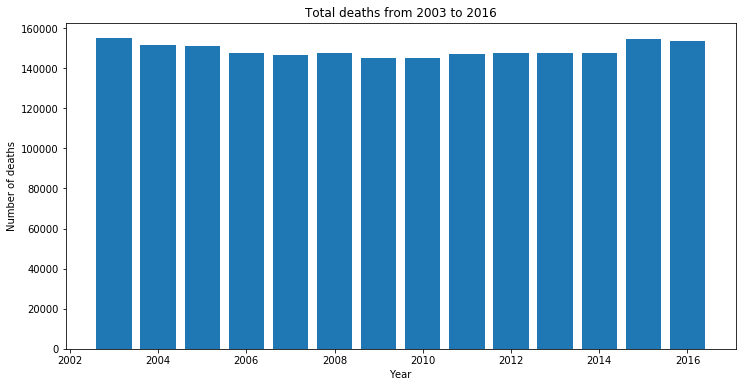

In [120]:
year_deaths = data.groupby('Year')['Deaths'].sum()

# creates a figure with a custom figure size
plt.figure(figsize=(12, 6))

# creates bar chart with the Year as the x-axis and the number of deaths as the y-axis
plt.bar(years, year_deaths)
plt.title("Total deaths from 2003 to 2016")
plt.xlabel("Year")
plt.ylabel("Number of deaths")
plt.show()

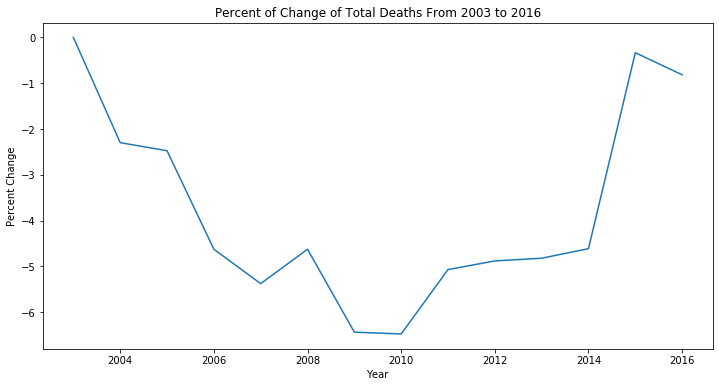

In [122]:
plt.figure(figsize=(12,6))

year_deaths = year_deaths.to_list()
year_deaths_percent_change = []

for x in range(len(year_deaths)):
    year_deaths_percent_change.append((year_deaths[x] - year_deaths[0]) / year_deaths[0] * 100)
    
plt.plot(years, year_deaths_percent_change)
plt.title('Percent of Change of Total Deaths From 2003 to 2016')
plt.xlabel('Year')
plt.ylabel('Percent Change')
plt.show()

In [101]:
#sums the number of deaths and groups them by race or ethnicity
data.groupby('Race or Ethnicity')['Deaths'].sum()

Race or Ethnicity
Black Non Hispanic      42183
Hispanic              1804310
Not Stated               4087
Other Non Hispanic      10833
White Non Hispanic     225698
Name: Deaths, dtype: int64

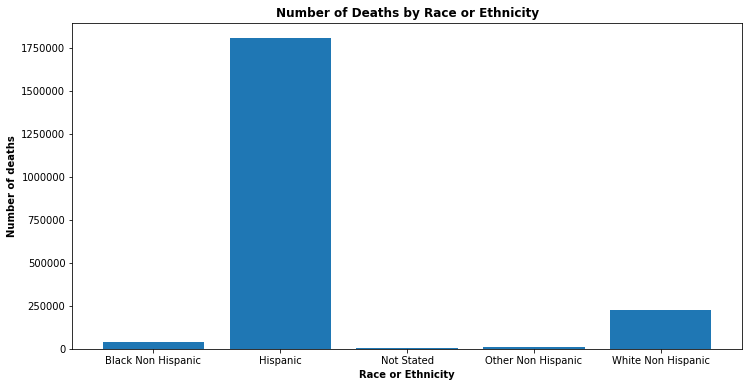

In [123]:
plt.figure(figsize=(12, 6))

re_deaths = data.groupby('Race or Ethnicity')['Deaths'].sum()
re = ['Black Non Hispanic', 'Hispanic', 'Not Stated', 'Other Non Hispanic', 'White Non Hispanic']

plt.bar(re_list, re_deaths)
plt.title('Number of Deaths by Race or Ethnicity', fontweight='bold')
plt.xlabel('Race or Ethnicity', fontweight='bold')
plt.ylabel('Number of deaths', fontweight='bold')
plt.show()

In [88]:
data.groupby('Selected Cause of Death')['Deaths'].sum()

Selected Cause of Death
AIDS                        12515
Accidents                   72518
All Other Causes           587500
CLRD                        94766
Cerebrovascular Disease     87447
Diabetes Mellitus           11363
Diseases of the Heart      661488
Malignant Neoplasms        492929
Pneumonia                   66585
Name: Deaths, dtype: int64

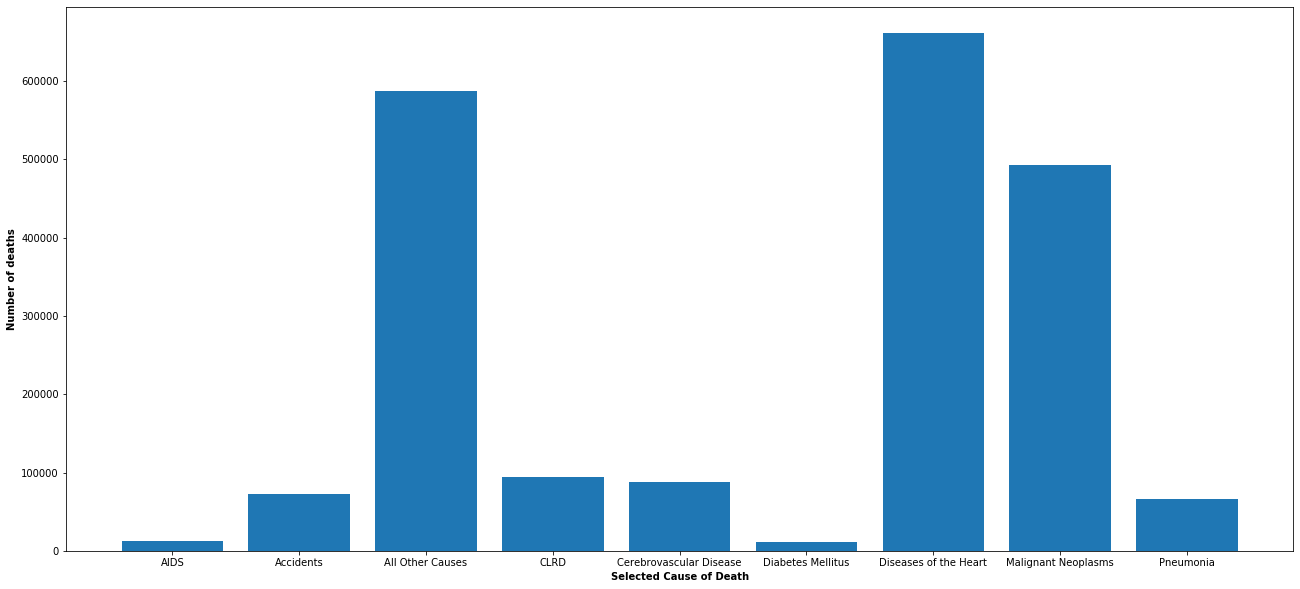

In [124]:
cause_deaths = data.groupby('Selected Cause of Death')['Deaths'].sum()
cause = ['AIDS', 'Accidents', 'All Other Causes', 'CLRD', 'Cerebrovascular Disease', 'Diabetes Mellitus', 
              'Diseases of the Heart', 'Malignant Neoplasms', 'Pneumonia']

plt.figure(figsize=(22, 10))
plt.bar(cause_list, cause_deaths)
plt.xlabel('Selected Cause of Death', fontweight='bold')
plt.ylabel('Number of deaths', fontweight='bold')
plt.show()

In [129]:
re_cause_deaths = data.groupby(['Race or Ethnicity', 'Selected Cause of Death'])['Deaths'].sum()
re_cause_deaths

Race or Ethnicity   Selected Cause of Death
Black Non Hispanic  AIDS                          611
                    Accidents                    1616
                    All Other Causes            13406
                    CLRD                         1217
                    Cerebrovascular Disease      1642
                    Diabetes Mellitus             284
                    Diseases of the Heart       12386
                    Malignant Neoplasms          9795
                    Pneumonia                    1226
Hispanic            AIDS                        11649
                    Accidents                   60360
                    All Other Causes           498375
                    CLRD                        81592
                    Cerebrovascular Disease     75943
                    Diabetes Mellitus            9865
                    Diseases of the Heart      579574
                    Malignant Neoplasms        428345
                    Pneumonia         

In [18]:
data.groupby(['Selected Cause of Death', 'Race or Ethnicity'])['Deaths'].sum()

Selected Cause of Death  Race or Ethnicity 
AIDS                     Black Non Hispanic       611
                         Hispanic               11649
                         Not Stated                50
                         Other Non Hispanic        12
                         White Non Hispanic       193
Accidents                Black Non Hispanic      1616
                         Hispanic               60360
                         Not Stated               183
                         Other Non Hispanic       404
                         White Non Hispanic      9955
All Other Causes         Black Non Hispanic     13406
                         Hispanic              498375
                         Not Stated              1413
                         Other Non Hispanic      3154
                         White Non Hispanic     71152
CLRD                     Black Non Hispanic      1217
                         Hispanic               81592
                         Not Stated   

In [127]:
#groups by year and then race or ethnicity and sums the number of deaths
year_re_deaths = data.groupby(['Year', 'Race or Ethnicity'])['Deaths'].sum()
year_re_deaths

Year  Race or Ethnicity 
2003  Black Non Hispanic       106
      Hispanic              154508
      Not Stated                25
      Other Non Hispanic        10
      White Non Hispanic       281
2004  Black Non Hispanic        40
      Hispanic              151118
      Not Stated                29
      Other Non Hispanic         7
      White Non Hispanic       175
2005  Black Non Hispanic        26
      Hispanic              150941
      Not Stated                19
      Other Non Hispanic         8
      White Non Hispanic       101
2006  Black Non Hispanic        22
      Hispanic              147597
      Not Stated                33
      Other Non Hispanic         4
      White Non Hispanic       104
2007  Black Non Hispanic        19
      Hispanic              146469
      Not Stated                25
      Other Non Hispanic         4
      White Non Hispanic        80
2008  Black Non Hispanic        22
      Hispanic              147626
      Not Stated              

In [20]:
type(year_re_deaths)

pandas.core.series.Series

In [21]:
pd.Series(year_re_deaths).values

array([   106, 154508,     25,     10,    281,     40, 151118,     29,
            7,    175,     26, 150941,     19,      8,    101,     22,
       147597,     33,      4,    104,     19, 146469,     25,      4,
           80,     22, 147626,     25,      1,     86,     29, 144798,
           27,      2,     98,     26, 144737,     38,     91,     31,
       146907,     23,      2,    109,     23, 147168,     34,      2,
          138,     23, 147290,     37,      2,    104,     43, 147457,
          105,      2,    173,  20686,  14023,   1873,   5233, 112599,
        21087,  13671,   1794,   5556, 111559], dtype=int64)

In [22]:
pd.Series(year_re_deaths).values[68]

111559

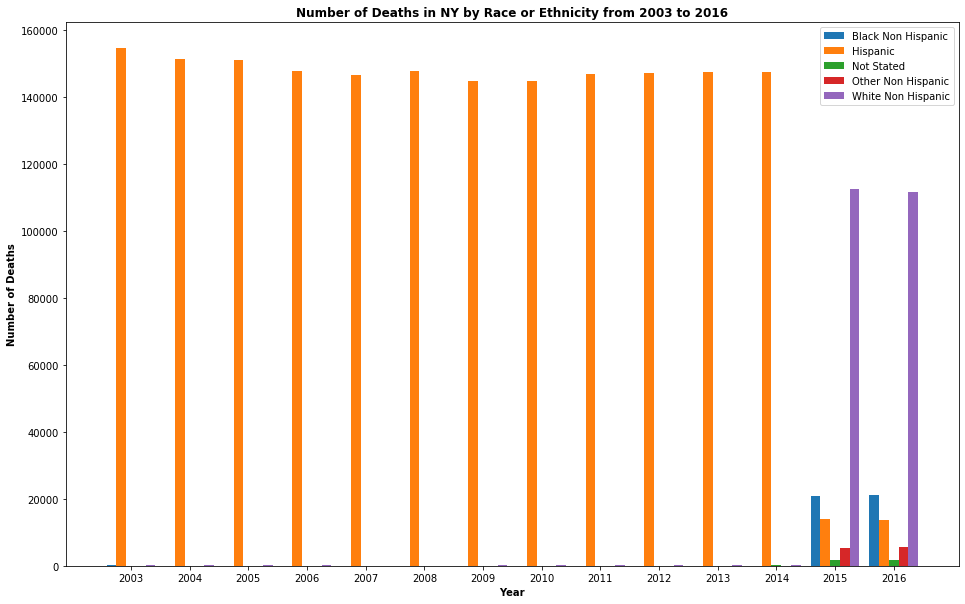

In [130]:
black, hispanic, not_stated, other, white = [], [], [], [], []

i = 0
while i < len(year_re_deaths):
    if(i != 35):
        black.append(year_re_deaths[i])
        hispanic.append(year_re_deaths[i+1])
        not_stated.append(year_re_deaths[i+2])
        other.append(year_re_deaths[i+3])
        white.append(year_re_deaths[i+4])
        i += 5
    else:
        black.append(year_re_deaths[i])
        hispanic.append(year_re_deaths[i+1])
        not_stated.append(year_re_deaths[i+2])
        white.append(year_re_deaths[i+3])
        i += 4
        
other.insert(7, 0)

plt.figure(figsize=(16, 10))

ind = np.arange(len(black))

bars = [black, hispanic, not_stated, other, white]
bar_width = 1/(len(bars) + 1)

# set position of bar on x-axis
p1 = ind
p2 = [x + bar_width for x in p1]
p3 = [x + bar_width for x in p2]
p4 = [x + bar_width for x in p3]
p5 = [x + bar_width for x in p4]
p = [p1, p2, p3, p4, p5]

labels = ('Black Non Hispanic', 'Hispanic', 'Not Stated', 'Other Non Hispanic', 'White Non Hispanic')

for j in range(len(bars)):
    plt.bar(p[j], bars[j], width=bar_width, label=labels[j])

plt.title('Number of Deaths in NY by Race or Ethnicity from 2003 to 2016', fontweight='bold')
plt.ylabel('Number of Deaths', fontweight='bold')
plt.xlabel('Year', fontweight='bold')
plt.xticks(p3, years_list)
plt.legend()
plt.show()

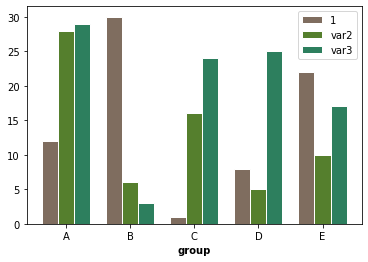

In [24]:
#EXAMPLE FOUND ONLINE 

# set width of bar
barWidth = 1/4.0
 
# set height of bar
bars1 = [12, 30, 1, 8, 22]
bars2 = [28, 6, 16, 5, 10]
bars3 = [29, 3, 24, 25, 17]
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label=1)
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='var2')
plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='var3')
 
# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['A', 'B', 'C', 'D', 'E'])
 
# Create legend & Show graphic
plt.legend()
plt.show()


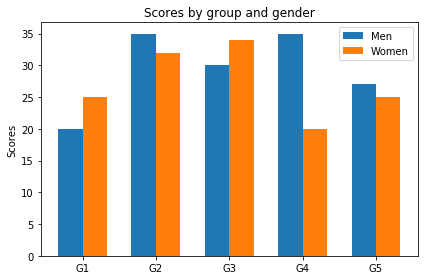

In [25]:
#EXAMPLE FOUND ONLINE

import matplotlib
import matplotlib.pyplot as plt
import numpy as np


men_means = (20, 35, 30, 35, 27)
women_means = (25, 32, 34, 20, 25)

ind = np.arange(len(men_means))  # the x locations for the groups
width = 1/3.0  # the width of the bars

fig, ax = plt.subplots()
ax.bar(ind - width/2, men_means, width,
                label='Men')
ax.bar(ind + width/2, women_means, width,
                label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(ind)
ax.set_xticklabels(('G1', 'G2', 'G3', 'G4', 'G5'))
ax.legend()

fig.tight_layout()

plt.show()

In [61]:
year_re_cause_deaths = data.groupby(['Year', 'Race or Ethnicity', 'Selected Cause of Death'])['Deaths'].sum()
year_re_cause_deaths

Year  Race or Ethnicity   Selected Cause of Death
2003  Black Non Hispanic  AIDS                           1
                          Accidents                      8
                          All Other Causes              35
                          Cerebrovascular Disease        4
                          Diabetes Mellitus              1
                          Diseases of the Heart         30
                          Malignant Neoplasms           25
                          Pneumonia                      2
      Hispanic            AIDS                        1675
                          Accidents                   4339
                          All Other Causes           37045
                          CLRD                        6709
                          Cerebrovascular Disease     7202
                          Diabetes Mellitus            905
                          Diseases of the Heart      55289
                          Malignant Neoplasms        35923
      